# **EDA + Logistic Regression + PCA**


## Tabla de contenido

El contenido de este núcleo se divide en varios temas que son los siguientes:

- La maldición de la dimensionalidad
- Introducción al Análisis de Componentes Principales
- Importar bibliotecas de Python
- Importar conjunto de datos
-	Análisis exploratorio de datos
- Dividir datos en conjunto de entrenamiento y prueba.
- Ingeniería de características
- Escalado de funciones
- Modelo de regresión logística con todas las características.
- Regresión logística con PCA
- Seleccione el número correcto de dimensiones
- Trazar la relación de varianza explicada con el número de dimensiones.
-	Conclusión
- Referencias


## La maldición de la dimensionalidad

Generalmente, los conjuntos de datos del mundo real contienen miles o millones de funciones para entrenar. Esta es una tarea que requiere mucho tiempo ya que hace que el entrenamiento sea extremadamente lento. En estos casos es muy difícil encontrar una buena solución. Este problema a menudo se conoce como la maldición de la dimensionalidad.


**La maldición de la dimensionalidad** se refiere a varios fenómenos que surgen cuando analizamos y organizamos datos en espacios de alta dimensión (a menudo con cientos o miles de dimensiones) que no ocurren en entornos de baja dimensión. El problema es que cuando aumenta la dimensionalidad, el volumen del espacio aumenta tan rápido que los datos disponibles se vuelven escasos. Esta escasez es problemática para cualquier método que requiera significación estadística.


En problemas del mundo real, a menudo es posible reducir considerablemente el número de dimensiones. Este proceso se llama **reducción de dimensionalidad**. Se refiere al proceso de reducir el número de dimensiones consideradas mediante la obtención de un conjunto de variables principales. Ayuda a acelerar el entrenamiento y también es extremadamente útil para la visualización de datos.


La técnica de reducción de dimensionalidad más popular es el Análisis de Componentes Principales (PCA), que se analiza a continuación.



## Introducción al Análisis de Componentes Principales (PCA)


**Análisis de componentes principales (PCA)** es una técnica de reducción de dimensionalidad que se puede utilizar para reducir un conjunto más grande de variables de características a un conjunto más pequeño que aún contiene la mayor parte de la varianza en el conjunto más grande.

### Preservar la variación

PCA primero identifica el hiperplano más cercano a los datos y luego los proyecta en él. Antes de que podamos proyectar el conjunto de entrenamiento en un hiperplano de dimensiones inferiores, debemos seleccionar el hiperplano correcto. La proyección se puede realizar de tal manera que se preserve la varianza máxima. Esta es la idea detrás de PCA.

### Componentes principales

PCA identifica los ejes que representan la cantidad máxima de suma acumulada de varianza en el conjunto de entrenamiento. Estos se denominan componentes principales. PCA supone que el conjunto de datos se centra en el origen. Las clases PCA de Scikit-Learn se encargan de centrar los datos automáticamente.

### Proyectando hasta d Dimensiones

Una vez que hayamos identificado todos los componentes principales, podemos reducir la dimensionalidad del conjunto de datos a d dimensiones proyectándolo en el hiperplano definido por los primeros d componentes principales. Esto garantiza que la proyección conserve la mayor variación posible.

## Import Python libraries

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [28]:
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, LassoCV, ElasticNetCV

def calculate_metrics(y_true, y_pred_prob, threshold=0.5):
    """
    Calcula las métricas AUC, Gini, F1-score y Recall para un modelo de regresión logística.

    Parameters:
    - y_true: array-like, Ground truth (correct) target values.
    - y_pred_prob: array-like, Predicted probabilities for the positive class.
    - threshold: float, Threshold for converting predicted probabilities to binary predictions.

    Returns:
    - metrics: dict, Dictionary containing AUC, Gini, F1-score and Recall.
    """
    # Calcular las predicciones binarias basadas en el umbral
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Calcular AUC
    auc = roc_auc_score(y_true, y_pred_prob)

    # Calcular Gini
    gini = 2 * auc - 1

    # Calcular F1-score
    f1 = f1_score(y_true, y_pred)

    # Calcular Recall
    recall = recall_score(y_true, y_pred)

    # Guardar métricas en un diccionario
    metrics = {
        'AUC': auc,
        'Gini': gini,
        'F1-score': f1,
        'Recall': recall
    }

    return metrics


def find_best_elasticnet_params(X, y, alphas=np.logspace(-6, 6, 13), l1_ratio=np.linspace(0.01, 1, 10), cv=5):
    """
    Encuentra los mejores parámetros para la regresión logística utilizando ElasticNetCV.

    Parameters:
    - X: array-like, Características de entrada.
    - y: array-like, Etiquetas de clase.
    - alphas: array-like, Valores de alfa a probar.
    - l1_ratio: array-like, Valores de l1_ratio a probar.
    - cv: int, Número de divisiones en la validación cruzada.

    Returns:
    - best_alpha: float, Mejor valor de alfa.
    - best_l1_ratio: float, Mejor valor de l1_ratio.
    """
    # Inicializar el modelo ElasticNetCV
    elasticnet_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratio, cv=cv)

    # Ajustar el modelo a los datos
    elasticnet_cv.fit(X, y)

    # Obtener el mejor valor de alfa
    best_alpha = elasticnet_cv.alpha_

    # Obtener el mejor valor de l1_ratio
    best_l1_ratio = elasticnet_cv.l1_ratio_

    return best_alpha, best_l1_ratio


def train_elasticnet_classifier(X, y, alpha=1.0, l1_ratio=0.5):
    """
    Entrena un modelo de clasificación Elastic Net.

    Parameters:
    - X: array-like, Características de entrada.
    - y: array-like, Etiquetas de clase.
    - alpha: float, Parámetro de regularización (mayor valor significa una mayor regularización).
    - l1_ratio: float, Proporción de la regularización L1 (0 significa solo L2, 1 significa solo L1).

    Returns:
    - elasticnet_model: objeto, Modelo de clasificación Elastic Net entrenado.
    """
    elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    elasticnet_model.fit(X, y)
    return elasticnet_model

## Import dataset

In [29]:
file = (r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Universidad Ricardo Palma\MATEMÁTICA Y ESTADÍSTICA EN CIENCIA DE DATOS\codigo\base de datos\adult.csv')
df = pd.read_csv(file, encoding='latin-1')

## Exploratory Data Analysis

In [30]:
df.shape

(32561, 15)

Podemos ver que hay 32561 instancias y 15 atributos en el conjunto de datos.

In [31]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Encode `?` as `NaNs`

In [33]:
df[df == '?'] = np.nan

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Ahora, el resumen muestra que las variables `workclass`, `occupation` y `native.country` contienen valores faltantes. Todas estas variables son de tipo de datos categóricos. Entonces, imputaré los valores faltantes con el valor más frecuente: la moda.

In [35]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

### Imputar valores faltantes con modo

In [36]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True) #imputar por la moda

### Verifique nuevamente si faltan valores

In [37]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Ahora podemos ver que no faltan valores en el conjunto de datos.

### Configuración del vector de características y la variable de destino

In [38]:
X = df.drop(['income'], axis=1)
y = df['income'].replace({'<=50K':0,'>50K':1})

In [39]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [40]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

## Dividir datos en conjuntos de prueba y entrenamiento separados

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Feature Engineering

### Codificar variables categóricas

In [42]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [43]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
32098,40,6,31627,9,13,2,3,5,4,0,0,0,20,38
25206,39,1,236391,11,9,2,6,0,4,1,0,0,38,38
23491,42,3,194710,15,10,4,3,1,4,0,0,0,40,38
12367,27,1,273929,11,9,4,4,3,4,1,0,0,40,38
7054,38,0,99527,12,14,2,3,0,4,1,0,0,40,38


In [44]:
X.workclass.value_counts()

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

## Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [46]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,-1.494279,-0.332263,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,0.438778,0.184396,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,0.045292,1.217715,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,0.793152,0.184396,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,-0.853275,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


## Modelo de regresión logística con todas las características.

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# print('Puntuación de precisión de regresión logística con todas las características: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# # Evaluar el rendimiento del modelo
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# print("Precisión del modelo:", accuracy)
# # print("Matriz de confusión:\n", conf_matrix)
# print("Informe de clasificación:\n", class_report)

model_1 = calculate_metrics(y_test, logreg.predict(X_test), threshold=0.5)
model_1

{'AUC': 0.6921018307009249,
 'Gini': 0.3842036614018498,
 'F1-score': 0.5445984828668585,
 'Recall': 0.44128868164476476}

## Regresión logística con PCA

La clase PCA de Scikit-Learn implementa el algoritmo PCA utilizando el siguiente código. Antes de profundizar, explicaré otro concepto importante llamado índice de varianza explicada.


### Relación de varianza explicada

Un dato muy útil es el **índice de varianza explicada** de cada componente principal. Está disponible a través de la variable `explained_variance_ratio_`. Indica la proporción de la varianza del conjunto de datos que se encuentra a lo largo del eje de cada componente principal.


In [48]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)

Proporción de varianza explicada por cada componente principal:
[0.14757168 0.10182915 0.08147199 0.07880174 0.07463545 0.07274281
 0.07009602 0.06750902 0.0647268  0.06131155 0.06084207 0.04839584
 0.04265038 0.02741548]


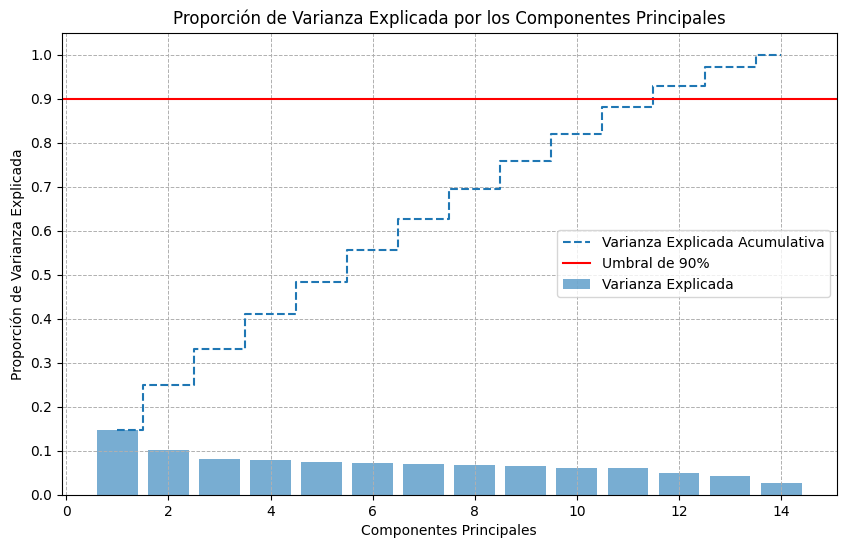

In [49]:
# Obtener la proporción de varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la varianza explicada acumulativa
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Imprimir la proporción de varianza explicada
print("Proporción de varianza explicada por cada componente principal:")
print(explained_variance_ratio)

# Graficar la proporción de varianza explicada y la varianza explicada acumulativa
plt.figure(figsize=(10, 6))

# Gráfico de barras de la proporción de varianza explicada
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, align='center', label='Varianza Explicada')

# Línea de la varianza explicada acumulativa
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', linestyle='--', label='Varianza Explicada Acumulativa')

# Configurar grillas
plt.grid(which='both', linestyle='--', linewidth=0.7)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.1))

# Método del codo
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Proporción de Varianza Explicada por los Componentes Principales')
plt.axhline(y=0.9, color='r', linestyle='-', label='Umbral de 90%')
plt.legend(loc='best')

plt.show()

### Comentario

- Podemos ver que aproximadamente el 97,25% de la varianza se explica por las 13 primeras variables.

- Sólo el 2,75% de la varianza se explica por la última variable. Entonces, podemos suponer que contiene poca información.

- Entonces se dejará, y entrenará el modelo nuevamente y con la precisión.



In [50]:
# Cargas factoriales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(len(loadings))], index=list(X.columns))

In [51]:
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
age,0.455804,0.097131,-0.473985,0.358455,0.088544,0.187523,0.080439,0.155766,-0.202916,-0.301294,0.004387,0.446117,0.072410,0.140452
workclass,0.156784,0.043009,-0.022209,-0.188804,0.451030,-0.069600,-0.774063,0.254305,-0.162736,0.037358,-0.190140,-0.004120,-0.033658,-0.013187
fnlwgt,-0.071984,0.173698,0.493983,0.039761,-0.191638,-0.349363,0.232346,0.565662,-0.372659,-0.040167,-0.185651,0.106364,-0.009001,-0.002269
education,0.152616,-0.726750,0.134664,0.024763,-0.119242,-0.151757,-0.137458,-0.123093,-0.250440,-0.225303,0.117329,-0.088672,0.472672,-0.003665
education.num,0.301944,-0.724816,0.224002,0.087819,-0.005522,0.081241,-0.008259,-0.010562,-0.066801,-0.013448,0.076151,0.091792,-0.544719,0.056824
marital.status,-0.481369,0.017508,0.425482,-0.297440,0.083165,0.072954,-0.115131,-0.119277,0.306701,-0.321888,0.091507,0.499463,0.054121,0.018771
occupation,0.042379,0.010539,0.375631,-0.034190,0.347442,0.734833,0.202679,0.015213,-0.277049,0.230637,-0.009659,-0.035468,0.150041,-0.007129
relationship,-0.777598,-0.254256,-0.155311,0.099183,0.035971,-0.012459,-0.030121,0.149508,0.009107,0.260784,-0.039159,-0.010325,0.051433,0.446872
race,0.242189,-0.046202,-0.223750,-0.621997,0.064647,-0.099315,0.161447,0.290361,-0.054904,0.188810,0.576646,0.073859,0.021267,0.028294
sex,0.676050,0.338285,0.309012,-0.201341,-0.040219,-0.046619,-0.006427,-0.199403,0.067428,-0.205133,-0.027489,-0.205663,-0.003014,0.399067


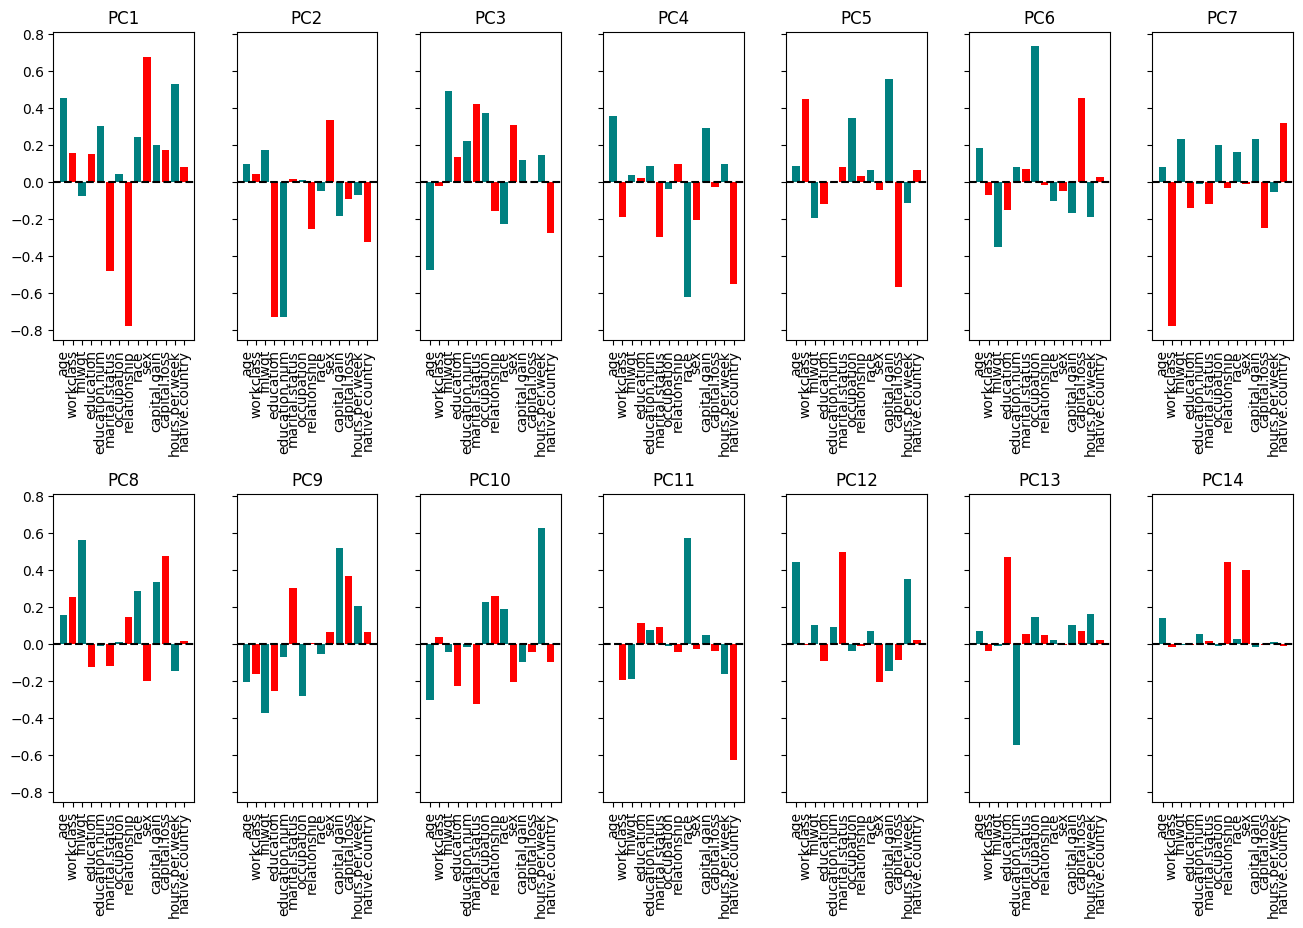

In [52]:
# Etiquetas para el eje x
etiquetas = X.columns

k = 7
n_rows = (loadings_df.shape[0] + 1) // k
fig, axes = plt.subplots(nrows=n_rows, ncols=k, figsize=(16, 10), sharey=True)

# Graficar las componentes principales
for i, (nombre_comp, comp) in enumerate(loadings_df.items()):
    row, col = i // k, i % k
    ax = axes[row, col]
    ax.bar(range(len(etiquetas)), comp, color=['teal', 'red'])
    ax.set_xticks(range(len(etiquetas)))
    ax.set_xticklabels(etiquetas, rotation=90)
    ax.axhline(y=0, color='black', linestyle='--')
    ax.set_title(nombre_comp)

# Ajustar espaciado y eliminar ejes vacíos
plt.subplots_adjust(hspace=0.5, wspace=0.3)
for ax in axes.flat[loadings_df.shape[0]:]:
    ax.axis('off')

plt.show()

In [54]:
# Ajustar PCA con una cantidad específica de componentes
n_components = 12
pca = PCA(n_components=n_components)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)
feature_names = X.columns
# Proporción de varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Cargas factoriales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [57]:
X_pca_train

array([[-1.74453448, -1.44372786, -2.16422698, ...,  0.04136948,
         0.08763314, -0.49169461],
       [ 0.62223658,  0.49117863,  0.13352266, ..., -0.47499948,
         0.36967462, -0.38769783],
       [-0.64701057, -1.08115659, -0.39157213, ..., -0.60731136,
         0.39256223,  1.03646263],
       ...,
       [-0.81413697,  1.67337571,  0.77139075, ...,  0.98860416,
        -1.56954208,  0.04683507],
       [ 1.46535949, -0.93546551, -0.39705611, ..., -0.64164019,
         0.40521065, -0.0545075 ],
       [ 0.9935644 ,  0.36895764, -0.17597071, ..., -0.64144046,
         0.05838336, -0.46921897]])

In [58]:
X_pca_train.shape

(22792, 12)

In [55]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Entrenar un modelo de regresión logística con los datos transformados
model = LogisticRegression(random_state=42)
model.fit(X_pca_train, y_train)

model_2 = calculate_metrics(y_test, model.predict(X_pca_test), threshold=0.5)
model_2

{'AUC': 0.6777371985087118,
 'Gini': 0.35547439701742367,
 'F1-score': 0.5128089887640449,
 'Recall': 0.4836795252225519}

In [60]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Ajustar PCA con una cantidad específica de componentes
n_components = 10
pca = PCA(n_components=n_components)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)

# Entrenar un modelo de regresión logística con los datos transformados
model3 = LogisticRegression(random_state=42)
model3.fit(X_pca_train, y_train)

model_3 = calculate_metrics(y_test, model3.predict(X_pca_test), threshold=0.5)
model_3

{'AUC': 0.6822700439754944,
 'Gini': 0.3645400879509888,
 'F1-score': 0.5213953488372093,
 'Recall': 0.47520135650699447}

In [61]:
# Ajustar PCA con una cantidad específica de componentes

best_alpha, best_l1_ratio = find_best_elasticnet_params(X_train, y_train)
logistic_model = train_elasticnet_classifier(X_train, y_train, alpha=best_alpha, l1_ratio=best_l1_ratio)
mt_en_1 = calculate_metrics(y_test, logistic_model.predict(X_test), threshold=0.5)
mt_en_1

{'AUC': 0.5617616856567348,
 'Gini': 0.12352337131346958,
 'F1-score': 0.11351706036745407,
 'Recall': 0.07333615938957186}

In [62]:
# Ajustar PCA con una cantidad específica de componentes
n_components = 12
pca = PCA(n_components=n_components)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)

best_alpha, best_l1_ratio = find_best_elasticnet_params(X_pca_train, y_train)
logistic_model = train_elasticnet_classifier(X_pca_train, y_train, alpha=best_alpha, l1_ratio=best_l1_ratio)
mt_en_2 = calculate_metrics(y_test, logistic_model.predict(X_pca_test), threshold=0.5)
mt_en_2

{'AUC': 0.8287956824267929,
 'Gini': 0.6575913648535858,
 'F1-score': 0.382149591451917,
 'Recall': 0.2577363289529462}

In [63]:
# Ajustar PCA con una cantidad específica de componentes
n_components = 10
pca = PCA(n_components=n_components)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)

best_alpha, best_l1_ratio = find_best_elasticnet_params(X_pca_train, y_train)
logistic_model = train_elasticnet_classifier(X_pca_train, y_train, alpha=best_alpha, l1_ratio=best_l1_ratio)
mt_en_3 = calculate_metrics(y_test, logistic_model.predict(X_pca_test), threshold=0.5)
mt_en_3

{'AUC': 0.8256782105915325,
 'Gini': 0.6513564211830649,
 'F1-score': 0.3705357142857143,
 'Recall': 0.24629080118694363}

In [64]:
resultados = pd.concat([pd.DataFrame([model_1]),
           pd.DataFrame([model_2]),
           pd.DataFrame([model_3]),
           pd.DataFrame([mt_en_1]),
           pd.DataFrame([mt_en_2]),
           pd.DataFrame([mt_en_3]),],axis=0,).T

resultados.columns = ['Logit_o','Logit_12PC','Logit_10PC','EN_o','EN_12PC','EN_10PC']

In [65]:
resultados

,Logit_o,Logit_12PC,Logit_10PC,EN_o,EN_12PC,EN_10PC
AUC,0.692102,0.677737,0.682270,0.561762,0.828796,0.825678
Gini,0.384204,0.355474,0.364540,0.123523,0.657591,0.651356
F1-score,0.544598,0.512809,0.521395,0.113517,0.382150,0.370536
Recall,0.441289,0.483680,0.475201,0.073336,0.257736,0.246291
